<a href="https://colab.research.google.com/github/Hansulich/park/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Golf Playing Dataset ===
    ID   Weather Temperature Humidity    Wind Golf
0    1     Sunny         Hot     High    Weak    N
1    2     Sunny         Hot     High  Strong    N
2    3  Overcast         Hot     High    Weak    Y
3    4     Rainy        Mild     High    Weak    Y
4    5     Rainy        Cool   Normal    Weak    Y
5    6     Rainy        Cool   Normal  Strong    N
6    7  Overcast        Cool   Normal  Strong    Y
7    8     Sunny        Mild     High    Weak    N
8    9     Sunny        Cool   Normal    Weak    Y
9   10     Rainy        Mild   Normal    Weak    Y
10  11     Sunny        Mild   Normal  Strong    Y
11  12  Overcast        Mild     High  Strong    Y
12  13  Overcast         Hot   Normal    Weak    Y
13  14     Rainy        Mild     High  Strong    N

Total data: 14 samples
Y: 9 samples, N: 5 samples

=== Step 1: Total Dataset Entropy ===
I(D) = -(9/14)×log₂(9/14) - (5/14)×log₂(5/14) = 0.940

=== Step 2: Root Node Selection - Information Gain for Each A

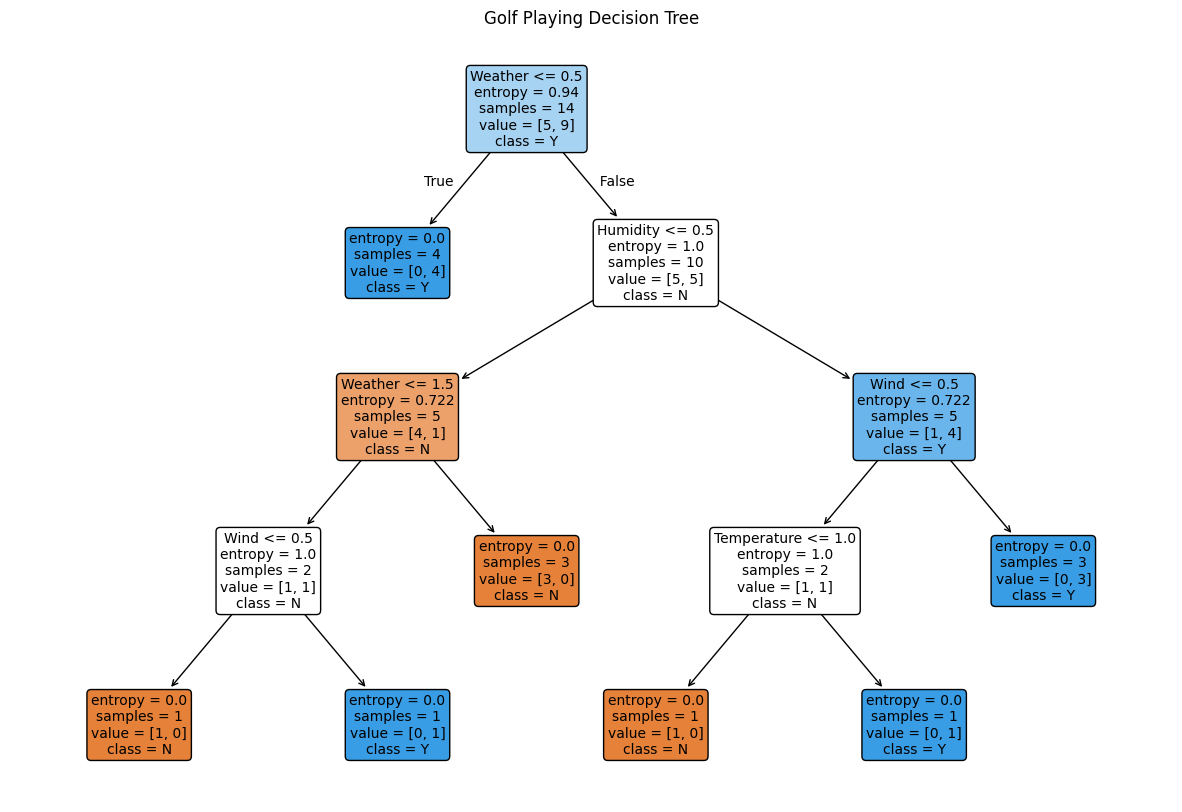


=== Encoding Mapping Information ===
Weather: {'Overcast': np.int64(0), 'Rainy': np.int64(1), 'Sunny': np.int64(2)}
Temperature: {'Cool': np.int64(0), 'Hot': np.int64(1), 'Mild': np.int64(2)}
Humidity: {'High': np.int64(0), 'Normal': np.int64(1)}
Wind: {'Strong': np.int64(0), 'Weak': np.int64(1)}

=== Final Result Summary ===
1. Root node: Weather (Information gain: 0.247)
2. Sunny → Humidity (Information gain: 0.971)
3. Rainy → Wind (Information gain: 0.971)
4. Overcast → Stop splitting (All Y)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import math

# Golf data from PDF (14 samples)
golf_data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Golf': ['N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']
}

df = pd.DataFrame(golf_data)
print("=== Golf Playing Dataset ===")
print(df)
print(f"\nTotal data: {len(df)} samples")
print(f"Y: {sum(df['Golf'] == 'Y')} samples, N: {sum(df['Golf'] == 'N')} samples")

# Entropy calculation function
def calculate_entropy(data):
    """Calculate entropy"""
    if len(data) == 0:
        return 0

    # Count each class
    counts = data.value_counts()
    total = len(data)

    entropy = 0
    for count in counts:
        if count > 0:
            p = count / total
            entropy -= p * math.log2(p)

    return entropy

# Information gain calculation function
def calculate_information_gain(df, target_col, feature_col):
    """Calculate information gain"""
    # Total entropy
    total_entropy = calculate_entropy(df[target_col])

    # Split by each attribute value
    feature_values = df[feature_col].unique()
    weighted_entropy = 0

    print(f"\n--- {feature_col} Attribute Split ---")
    for value in feature_values:
        subset = df[df[feature_col] == value]
        subset_target = subset[target_col]

        weight = len(subset) / len(df)
        subset_entropy = calculate_entropy(subset_target)
        weighted_entropy += weight * subset_entropy

        y_count = sum(subset_target == 'Y')
        n_count = sum(subset_target == 'N')
        print(f"{feature_col}={value}: {subset['ID'].tolist()}")
        print(f"  Y: {y_count}, N: {n_count}, Entropy: {subset_entropy:.3f}")

    information_gain = total_entropy - weighted_entropy
    print(f"Information Gain G(D, {feature_col}) = {total_entropy:.3f} - {weighted_entropy:.3f} = {information_gain:.3f}")

    return information_gain, total_entropy, weighted_entropy

# Step 1: Calculate entropy of entire dataset
print("\n=== Step 1: Total Dataset Entropy ===")
total_entropy = calculate_entropy(df['Golf'])
print(f"I(D) = -(9/14)×log₂(9/14) - (5/14)×log₂(5/14) = {total_entropy:.3f}")

# Step 2: Calculate information gain for each attribute (root node selection)
print("\n=== Step 2: Root Node Selection - Information Gain for Each Attribute ===")
attributes = ['Weather', 'Temperature', 'Humidity', 'Wind']
gains = {}

for attr in attributes:
    gain, _, _ = calculate_information_gain(df, 'Golf', attr)
    gains[attr] = gain

print("\n--- Information Gain Comparison ---")
for attr, gain in gains.items():
    print(f"G(D, {attr}) = {gain:.3f}")

# Select attribute with highest information gain
best_attribute = max(gains, key=gains.get)
print(f"\nConclusion: {best_attribute} has the highest information gain ({gains[best_attribute]:.3f}), selected as root node")

# Step 3: Create intermediate node - Sunny node
print("\n=== Step 3: Intermediate Node - Weather=Sunny Split ===")
sunny_data = df[df['Weather'] == 'Sunny']
print(f"Sunny data: {sunny_data['ID'].tolist()}")
print(f"Y: {sum(sunny_data['Golf'] == 'Y')}, N: {sum(sunny_data['Golf'] == 'N')}")

sunny_entropy = calculate_entropy(sunny_data['Golf'])
print(f"Sunny data entropy: {sunny_entropy:.3f}")

# Information gain for sub-attributes of Sunny node
sunny_gains = {}
remaining_attrs = ['Temperature', 'Humidity', 'Wind']

for attr in remaining_attrs:
    gain, _, _ = calculate_information_gain(sunny_data, 'Golf', attr)
    sunny_gains[attr] = gain

print("\n--- Sunny Node Information Gain Comparison ---")
for attr, gain in sunny_gains.items():
    print(f"G(D_Sunny, {attr}) = {gain:.3f}")

best_sunny_attr = max(sunny_gains, key=sunny_gains.get)
print(f"Conclusion: {best_sunny_attr} has the highest information gain")

# Step 4: Create intermediate node - Rainy node
print("\n=== Step 4: Intermediate Node - Weather=Rainy Split ===")
rainy_data = df[df['Weather'] == 'Rainy']
print(f"Rainy data: {rainy_data['ID'].tolist()}")
print(f"Y: {sum(rainy_data['Golf'] == 'Y')}, N: {sum(rainy_data['Golf'] == 'N')}")

rainy_entropy = calculate_entropy(rainy_data['Golf'])
print(f"Rainy data entropy: {rainy_entropy:.3f}")

# Information gain for sub-attributes of Rainy node
rainy_gains = {}

for attr in remaining_attrs:
    gain, _, _ = calculate_information_gain(rainy_data, 'Golf', attr)
    rainy_gains[attr] = gain

print("\n--- Rainy Node Information Gain Comparison ---")
for attr, gain in rainy_gains.items():
    print(f"G(D_Rainy, {attr}) = {gain:.3f}")

best_rainy_attr = max(rainy_gains, key=rainy_gains.get)
print(f"Conclusion: {best_rainy_attr} has the highest information gain")

# Check Overcast node
print("\n=== Overcast Node Check ===")
cloudy_data = df[df['Weather'] == 'Overcast']
print(f"Overcast data: {cloudy_data['ID'].tolist()}")
print(f"Y: {sum(cloudy_data['Golf'] == 'Y')}, N: {sum(cloudy_data['Golf'] == 'N')}")
cloudy_entropy = calculate_entropy(cloudy_data['Golf'])
print(f"Overcast data entropy: {cloudy_entropy:.3f} (All Y, stop splitting)")

# Data encoding for visualization
print("\n=== Decision Tree Visualization ===")

# Encode categorical data to numbers
from sklearn.preprocessing import LabelEncoder

# Feature encoding
le_dict = {}
X_encoded = df[['Weather', 'Temperature', 'Humidity', 'Wind']].copy()

for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_dict[col] = le

# Target encoding
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['Golf'])

# Train decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_encoded, y_encoded)

# Visualize tree
plt.figure(figsize=(15, 10))
plot_tree(clf,
          feature_names=['Weather', 'Temperature', 'Humidity', 'Wind'],
          class_names=['N', 'Y'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Golf Playing Decision Tree')
plt.show()

# Output encoding mapping information
print("\n=== Encoding Mapping Information ===")
for col, le in le_dict.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")

print("\n=== Final Result Summary ===")
print(f"1. Root node: {best_attribute} (Information gain: {gains[best_attribute]:.3f})")
print(f"2. Sunny → {best_sunny_attr} (Information gain: {sunny_gains[best_sunny_attr]:.3f})")
print(f"3. Rainy → {best_rainy_attr} (Information gain: {rainy_gains[best_rainy_attr]:.3f})")
print(f"4. Overcast → Stop splitting (All Y)")